## Stock price fetching using yfinance

Import the necessary libraries

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load and Prepare the Data

In [2]:
file_path = '../data/raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

Convert 'date' column to datetime format

In [3]:
df['date'] = pd.to_datetime(df['date'], format='ISO8601')

Get the top 5 symbols

In [4]:
# Identify unique stock symbols and their frequencies
symbol_freq = df['stock'].value_counts()

# Get the top 5 symbols with the highest frequency
top_5_symbols = symbol_freq.index[:5]

Identify Stock Symbols and Date Ranges

In [5]:
# Calculate date ranges for each of the top 5 stocks
date_ranges = {}
for symbol in top_5_symbols:
    symbol_data = df[df['stock'] == symbol]
    symbol_data.loc[:, 'date'] = pd.to_datetime(symbol_data['date'], format='ISO8601', utc=True)

    start_date = symbol_data['date'].min()
    end_date = symbol_data['date'].max()
    date_ranges[symbol] = (start_date, end_date)

Fetch stock prices using yfinance

In [6]:
# Fetch stock prices using yfinance
stock_data = {}
for symbol, (start_date, end_date) in date_ranges.items():
    if pd.notnull(symbol):  # Check if symbol is not NaN
        ticker = yf.Ticker(str(symbol))  # Convert symbol to string just to be safe
        stock_data[symbol] = ticker.history(start=start_date, end=end_date)

Print or visualize the results

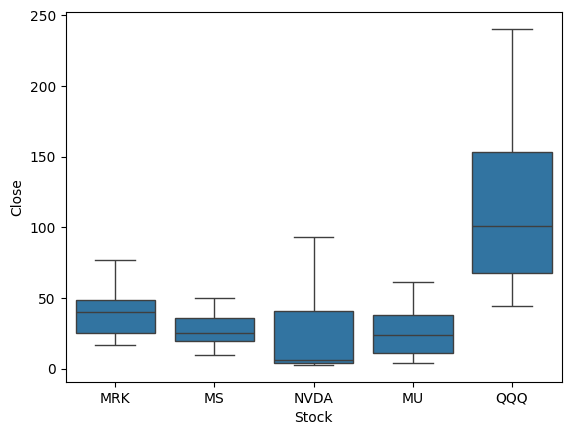

In [7]:
# Create a new DataFrame for seaborn plotting
plot_data = pd.DataFrame()

# Loop over each of the top 5 stocks
for symbol, data in stock_data.items():
    # Add the 'Close' prices to the plot data
    temp_df = data[['Close']].copy()
    temp_df['Stock'] = symbol
    plot_data = pd.concat([plot_data, temp_df])

# Create a box plot
sns.boxplot(x='Stock', y='Close', data=plot_data)

# Show the plot
plt.show()